In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.optimizers import Adam

In [13]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [14]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
tf.config.set_visible_devices([], 'GPU')

In [16]:
# Generate the moons dataset
X, y = make_moons(n_samples=10000, shuffle=True, noise=0.2, random_state=42)

In [17]:
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


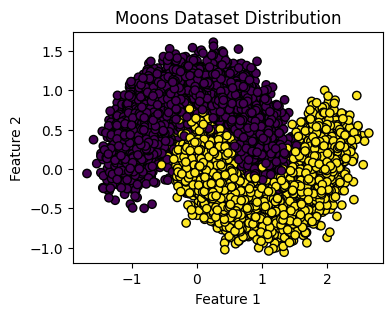

In [18]:
# Plot the data distribution
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset Distribution')
plt.show()

In [19]:
# y = to_categorical(y)

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 2)
(7000,)
(3000, 2)
(3000,)


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),   # Input layer with 2 features
    Dense(4, activation='relu'),                      # Hidden layer
    Dense(1, activation='sigmoid')                    # Output layer for binary classification
])

optimizer = Adam(learning_rate=0.0002)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=200, batch_size=64,
                  validation_data=(X_test, y_test))#,callbacks=[early_stopping])

In [32]:
print('loss:', history.history['loss'])
print('accuracy:', history.history['accuracy'])
print('val_loss:', history.history['val_loss'])
print('val_accuracy:', history.history['val_accuracy'])

loss: [0.21123409271240234, 0.2021423578262329, 0.19124309718608856, 0.18162085115909576, 0.17382997274398804, 0.1677037477493286, 0.16287356615066528, 0.15892358124256134, 0.15557248890399933, 0.1525932252407074, 0.14985184371471405, 0.14729061722755432, 0.14484301209449768, 0.14252349734306335, 0.14029531180858612, 0.13813374936580658, 0.13602270185947418, 0.13394130766391754, 0.13189011812210083, 0.1298646628856659, 0.1278410404920578, 0.12584853172302246, 0.12387219816446304, 0.12188486009836197, 0.11988332867622375, 0.11787475645542145, 0.1158696785569191, 0.11386183649301529, 0.11184144765138626, 0.10980121791362762, 0.10774040967226028, 0.10566568374633789, 0.10358763486146927, 0.10148874670267105, 0.09938351064920425, 0.09728172421455383, 0.09516662359237671, 0.0930827260017395, 0.09100478142499924, 0.08896749466657639, 0.08696656674146652, 0.08500681072473526, 0.08308051526546478, 0.0812012329697609, 0.0793687030673027, 0.07758041471242905, 0.07585657387971878, 0.0741468742489

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('\nTest accuracy:', accuracy)

 1/94 [..............................] - ETA: 1s - loss: 0.0296 - accuracy: 0.9688

94/94 [==============================] - 0s 760us/step - loss: 0.0234 - accuracy: 0.9680

Test accuracy: 0.9679999947547913
